# MINI PROJECT
## Large Data Management (LDM)

In [3]:
import pymongo
from pymongo import MongoClient

In [4]:
client = MongoClient("mongodb://localhost:27017")
db = client["nobel"]
prizes_collection = db["prizes"]
laureates_collection = db["laureates"]
filter = {}

### Part 01: Getting started with Databases

In [5]:
#count document in 'prizes' collection
n_prizes = db.prizes.count_documents(filter)
print(f'- Collection {"prizes"}: {n_prizes} documents')

- Collection prizes: 590 documents


In [6]:
#count document in 'laureates' collection
n_laureates = db.laureates.count_documents(filter)
print(f'- Collection {"laureates"}: {n_laureates} documents')

- Collection laureates: 934 documents


#### Task 01 - List database & collection names

In [7]:
# list of databases managed by client
db_names = client.list_database_names()
print(db_names)

['Comparison', 'admin', 'aggregation_test', 'config', 'datacar', 'db02', 'db03', 'hospital', 'local', 'my_store', 'nobel', 'support']


In [8]:
# list of collections managed by 'nobel' database 
nobel_coll_names = db.list_collection_names()
nobel_coll_names

['laureates', 'prizes']

### Part 02: Data Analysis Intuition

### Part 03: DATA Analysis

#### Task 02 - Retrive sample in prizes & laureates collection, get their lists of fields

In [9]:
# Connect to the "nobel" database
db = client.nobel

In [10]:
# Retrieve one 'prizes' document
prize = db.prizes.find_one()
print(prize)
print(type(prize))

{'_id': ObjectId('63d9c9fc42b546d870b83629'), 'year': '2018', 'category': 'physics', 'overallMotivation': '“for groundbreaking inventions in the field of laser physics”', 'laureates': [{'id': '960', 'firstname': 'Arthur', 'surname': 'Ashkin', 'motivation': '"for the optical tweezers and their application to biological systems"', 'share': '2'}, {'id': '961', 'firstname': 'Gérard', 'surname': 'Mourou', 'motivation': '"for their method of generating high-intensity, ultra-short optical pulses"', 'share': '4'}, {'id': '962', 'firstname': 'Donna', 'surname': 'Strickland', 'motivation': '"for their method of generating high-intensity, ultra-short optical pulses"', 'share': '4'}]}
<class 'dict'>


In [11]:
# Retrieve one 'laureates' document
laureate = db.laureates.find_one()
print(laureate)
print(type(laureate))

{'_id': ObjectId('63d9c9ee42b546d870b83282'), 'id': '2', 'firstname': 'Hendrik Antoon', 'surname': 'Lorentz', 'born': '1853-07-18', 'died': '1928-02-04', 'bornCountry': 'the Netherlands', 'bornCountryCode': 'NL', 'bornCity': 'Arnhem', 'diedCountry': 'the Netherlands', 'diedCountryCode': 'NL', 'gender': 'male', 'prizes': [{'year': '1902', 'category': 'physics', 'share': '2', 'motivation': '"in recognition of the extraordinary service they rendered by their researches into the influence of magnetism upon radiation phenomena"', 'affiliations': [{'name': 'Leiden University', 'city': 'Leiden', 'country': 'the Netherlands'}]}]}
<class 'dict'>


In [12]:
# Get the fields present in each type of document
prize_fields = list(prize.keys())
laureate_fields = list(laureate.keys())

print(prize_fields)
print(laureate_fields)

['_id', 'year', 'category', 'overallMotivation', 'laureates']
['_id', 'id', 'firstname', 'surname', 'born', 'died', 'bornCountry', 'bornCountryCode', 'bornCity', 'diedCountry', 'diedCountryCode', 'gender', 'prizes']


#### Task 03 - Filter the "born" field

In [13]:
# The number of laureates born prior to 1800:
db.laureates.count_documents({"born": {"$lt": "1800"}}) 

38

In [14]:
# The number of laureates born prior to 1700:
db.laureates.count_documents({"born": {"$lt": "1700"}}) 

38

#### Task 04 - Composing filters

In [15]:
# The number of laureates died in USA
## Create a filter for laureates who died in the USA
criteria = {"diedCountry": "USA"}

## Save the count of these laureates
count = db.laureates.count_documents(criteria)
print(count)

209


In [16]:
# The number of laureates were born in Germany and died in USA
## Create a filter for laureates who died in the USA but were born in Germany
criteria = {"diedCountry": "USA",
            "bornCountry": "Germany"}

## Save the count of these laureates
count = db.laureates.count_documents(criteria)
print(count)

5


In [17]:
# The number of laureates whose firstname was "Albert", born in Germany and died in USA
## Create a filter for Germany-born laureates who died in the USA and with the first name "Albert"
criteria = {"diedCountry": "USA",
            "bornCountry": "Germany",
            "firstname": "Albert"}

## Save the count of these laureates
count = db.laureates.count_documents(criteria)
print(count)

1


#### Task 05 - Filter by use the $in and the $ne

In [18]:
# The number of laureates born in USA, Canada or Mexico
## Save a filter for laureates born in the USA, Canada, or Mexico
criteria = {"bornCountry":
            { "$in": ["USA", "Canada", "Mexico"]}}

## Count them and save the count
count = db.laureates.count_documents(criteria)
print(count)

291


In [19]:
# The number oflLaureates died in USA and not born in USA
## Save a filter for laureates who died in the USA and were not born there
criteria = {"diedCountry": "USA",
            "bornCountry": { "$ne": "USA"}}

## Count them and save the count
count = db.laureates.count_documents(criteria)
print(count)

69


#### Task 06 - Filter by more specific details

In [20]:
# The number of laureates born in Austria with a prize affiliation country is not also Austria
## Filter for laureates born in Austria with non-Austria prize affiliation
criteria = {"bornCountry": "Austria",
            "prizes.affiliations.country": {"$ne": "Austria"}}

## Count the number of such laureates
count = db.laureates.count_documents(criteria)
print(count)

10


#### Task 07 - Filter exist

In [21]:
# The number of laureates with "born" field value "0000-00-00"
## Filter for documents with "born" field value "0000-00-00"
criteria = {"born": "0000-00-00"}

## Save count
count = db.laureates.count_documents(criteria)
print(count)

38


In [22]:
# The number of laureates without a "born" field
## Filter for documents without a "born" field
criteria = {"born": {"$exists": False}}

## Save count
count = db.laureates.count_documents(criteria)
print(count)

0


In [23]:
# A laureate won at least 3 prizes
## Filter for laureates with at least three prizes
criteria = {"prizes.2": {"$exists": True}}

## Find one laureate with at least three prizes
doc = db.laureates.find_one(criteria)

## Print the document
print(doc)

{'_id': ObjectId('63d9c9ee42b546d870b833b8'), 'id': '482', 'firstname': 'Comité international de la Croix Rouge (International Committee of the Red Cross)', 'born': '0000-00-00', 'died': '0000-00-00', 'gender': 'org', 'prizes': [{'year': '1917', 'category': 'peace', 'share': '1', 'affiliations': [[]]}, {'year': '1944', 'category': 'peace', 'share': '1', 'affiliations': [[]]}, {'year': '1963', 'category': 'peace', 'share': '2', 'affiliations': [[]]}]}


In [24]:
# BONUS: The number of laureates won at least 2 prizes
## Filter for laureates with at least two prizes
criteria = {"prizes.1": {"$exists": True}}

## Find one laureate with at least two prizes
docs = db.laureates.find(criteria)

## Print the document
for doc in docs:
    print(f'{doc}\n\n')

{'_id': ObjectId('63d9c9ee42b546d870b832bf'), 'id': '217', 'firstname': 'Linus Carl', 'surname': 'Pauling', 'born': '1901-02-28', 'died': '1994-08-19', 'bornCountry': 'USA', 'bornCountryCode': 'US', 'bornCity': 'Portland, OR', 'diedCountry': 'USA', 'diedCountryCode': 'US', 'diedCity': 'Big Sur, CA', 'gender': 'male', 'prizes': [{'year': '1954', 'category': 'chemistry', 'share': '1', 'motivation': '"for his research into the nature of the chemical bond and its application to the elucidation of the structure of complex substances"', 'affiliations': [{'name': 'California Institute of Technology (Caltech)', 'city': 'Pasadena, CA', 'country': 'USA'}]}, {'year': '1962', 'category': 'peace', 'share': '1', 'affiliations': [{'name': 'California Institute of Technology (Caltech)', 'city': 'Pasadena, CA', 'country': 'USA'}]}]}


{'_id': ObjectId('63d9c9ee42b546d870b832c6'), 'id': '6', 'firstname': 'Marie', 'surname': 'Curie, née Sklodowska', 'born': '1867-11-07', 'died': '1934-07-04', 'bornCountr

#### Task 08 - Working with Distinct

In [25]:
# find one sample 'prizes'
db.prizes.find_one()

{'_id': ObjectId('63d9c9fc42b546d870b83629'),
 'year': '2018',
 'category': 'physics',
 'overallMotivation': '“for groundbreaking inventions in the field of laser physics”',
 'laureates': [{'id': '960',
   'firstname': 'Arthur',
   'surname': 'Ashkin',
   'motivation': '"for the optical tweezers and their application to biological systems"',
   'share': '2'},
  {'id': '961',
   'firstname': 'Gérard',
   'surname': 'Mourou',
   'motivation': '"for their method of generating high-intensity, ultra-short optical pulses"',
   'share': '4'},
  {'id': '962',
   'firstname': 'Donna',
   'surname': 'Strickland',
   'motivation': '"for their method of generating high-intensity, ultra-short optical pulses"',
   'share': '4'}]}

In [26]:
# Find one sample 'laureates'
db.laureates.find_one()

{'_id': ObjectId('63d9c9ee42b546d870b83282'),
 'id': '2',
 'firstname': 'Hendrik Antoon',
 'surname': 'Lorentz',
 'born': '1853-07-18',
 'died': '1928-02-04',
 'bornCountry': 'the Netherlands',
 'bornCountryCode': 'NL',
 'bornCity': 'Arnhem',
 'diedCountry': 'the Netherlands',
 'diedCountryCode': 'NL',
 'gender': 'male',
 'prizes': [{'year': '1902',
   'category': 'physics',
   'share': '2',
   'motivation': '"in recognition of the extraordinary service they rendered by their researches into the influence of magnetism upon radiation phenomena"',
   'affiliations': [{'name': 'Leiden University',
     'city': 'Leiden',
     'country': 'the Netherlands'}]}]}

In [27]:
# Check same distinct categories between prizes category and prizes categories in 'laureates' collection
set(db.prizes.distinct("category")) == set(db.laureates.distinct("prizes.category"))

True

In [28]:
# Asserts that the distinct Nobel Prize categories catalogued by the "prizes" collection are the same as those catalogued by the "laureates"
assert set(db.prizes.distinct("category")) == set(db.laureates.distinct("prizes.category"))

#### Task 09 - diedCountry vs. bornCountry

In [29]:
# Countries recorded as countries of death but not as countries of birth
countries = set(db.laureates.distinct("diedCountry")) - set(db.laureates.distinct("bornCountry"))
print(countries)

{'Jamaica', 'Northern Rhodesia (now Zambia)', 'Puerto Rico', 'Barbados', 'Gabon', 'Philippines', 'Tunisia', 'Greece', 'Czechoslovakia', 'USSR', 'Israel', 'Yugoslavia (now Serbia)', 'East Germany'}


#### Task 10 - Affiliation countries

In [30]:
# The number of distinct countries of laureate affiliation for prizes
count = len(db.laureates.distinct("prizes.affiliations.country"))
print(count)

29


#### Task 11 - Countries' affilitions of USA-born laureates

In [31]:
# Countries had affiliations for USA-born laureates' prizes
db.laureates.distinct("prizes.affiliations.country", {"bornCountry": "USA"})

['Australia', 'Denmark', 'USA', 'United Kingdom']

#### Task 12 - Prizes shared by 3 or more laureates

In [410]:
# Save a filter for prize documents with three or more laureates
criteria = {"laureates.2": {"$exists": True}}

In [33]:
# Save the set of distinct prize categories in documents satisfying the criteria
triple_play_categories = set(db.prizes.distinct("category", criteria))

In [34]:
print(triple_play_categories)

{'medicine', 'chemistry', 'physics', 'peace', 'economics'}


In [35]:
# Confirm that "literature" is the only prize category with no prizes shared by three or more laureates
set(db.prizes.distinct("category")) - triple_play_categories == {"literature"}

True

#### Task 13 - Physics sharing after World War II

In [36]:
# Number of laureates who won an unshared ({"share": "1"}) prize in physics after World War II 
db.laureates.count_documents({
            "prizes": {"$elemMatch": {
                "category": "physics",
                "share": {"$ne": "1"},
                "year": {"$gte": "1945"}}}})

143

In [37]:
# Number of laureates who won a shared prize in physics after World War II
db.laureates.count_documents({
            "prizes": {"$elemMatch": {
                "category": "physics",
                "share": "1",
                "year": {"$gte": "1945"}}}})

18

In [38]:
# Compute the ratio
18/143

0.1258741258741259

####  Task 14 - The ratio for prize categories other than physics, chemistry, and medicine

In [404]:
# Save a filter for laureates with unshared prizes
unshared = {
    "prizes": {"$elemMatch": {
        "category": {"$nin": ["physics", "chemistry", "medicine"]},
        "share": "1",
        "year": {"$gte": "1945"},
    }}}

{'prizes': {'$elemMatch': {'category': {'$nin': ['physics',
     'chemistry',
     'medicine']},
   'share': '1',
   'year': {'$gte': '1945'}}}}

In [40]:
# Save a filter for laureates with shared prizes
shared = {
    "prizes": {"$elemMatch": {
        "category": {"$nin": ["physics", "chemistry", "medicine"]},
        "share": {"$ne": "1"},
        "year": {"$gte": "1945"},
    }}}

In [41]:
# Compute the ratio
ratio = db.laureates.count_documents(unshared) / db.laureates.count_documents(shared)
print(ratio)

1.3653846153846154


#### Task 15 - Organizations and prizes over time

In [42]:
# Save a filter for organization laureates with prizes won before 1945
before_1945 = {"gender": "org", "prizes.year": {"$lt": "1945"}}

In [43]:
# Save a filter for organization laureates with prizes won in or after 1945
in_or_after_1945 = {"gender": "org", "prizes.year": {"$gte": "1945"}}

In [44]:
# Count the number of organisations won prizes before and after 1945
n_before = db.laureates.count_documents(before_1945)
n_in_or_after = db.laureates.count_documents(in_or_after_1945)

In [45]:
# Calculate ratio
ratio = n_in_or_after / (n_in_or_after + n_before)
print(ratio)

0.84


#### Task 16 - Laureates' first name beginning with G & surname beginning with S

In [46]:
from bson.regex import Regex
# Number of laureates have a first name beginning with "G" and a surname beginning with "S"
db.laureates.count_documents({"firstname": Regex("^G.+"), "surname": Regex("^S.+")})

9

In [47]:
# Filter for laureates with "Germany" in their "bornCountry" value
criteria = {"bornCountry": Regex("Germany", 0)}
print(set(db.laureates.distinct("bornCountry", criteria)))

{'Germany', 'West Germany (now Germany)', 'Germany (now Russia)', 'Mecklenburg (now Germany)', 'East Friesland (now Germany)', 'Schleswig (now Germany)', 'Bavaria (now Germany)', 'Prussia (now Germany)', 'W&uuml;rttemberg (now Germany)', 'Germany (now France)', 'Germany (now Poland)', 'Hesse-Kassel (now Germany)'}


In [48]:
# Filter for laureates with a "bornCountry" value starting with "Germany"
criteria = {"bornCountry": Regex("^Germany", 0)}
print(set(db.laureates.distinct("bornCountry", criteria)))

{'Germany', 'Germany (now Poland)', 'Germany (now Russia)', 'Germany (now France)'}


In [49]:
# Filter for laureates born in "^Germany " but "now" another country
criteria = {"bornCountry": Regex("^Germany " + "\\(" + "now", 0)}
print(set(db.laureates.distinct("bornCountry", criteria)))

{'Germany (now Poland)', 'Germany (now Russia)', 'Germany (now France)'}


In [50]:
# Filter for laureates born in now "Germany" but "past" another country
criteria = {"bornCountry": Regex("now" + " Germany\\)", 0)}
print(set(db.laureates.distinct("bornCountry", criteria)))

{'West Germany (now Germany)', 'Mecklenburg (now Germany)', 'East Friesland (now Germany)', 'Schleswig (now Germany)', 'Bavaria (now Germany)', 'Prussia (now Germany)', 'W&uuml;rttemberg (now Germany)', 'Hesse-Kassel (now Germany)'}


In [51]:
# Filter for laureates born in now "Germany" but "past" another country
criteria = {"bornCountry": Regex("now" + " Germany\\)" + "$", 0)}
print(set(db.laureates.distinct("bornCountry", criteria)))

{'West Germany (now Germany)', 'Mecklenburg (now Germany)', 'East Friesland (now Germany)', 'Schleswig (now Germany)', 'Bavaria (now Germany)', 'Prussia (now Germany)', 'W&uuml;rttemberg (now Germany)', 'Hesse-Kassel (now Germany)'}


#### Task 17 - The prized transistor

In [52]:
# Save a filter for laureates with prize motivation values containing "transistor" as a substring
criteria = {"prizes.motivation": Regex("transistor", 0)}

In [53]:
# Save the field names corresponding to a laureate's first name and last name
first, last = ["firstname", "surname"]
print([(laureate[first], laureate[last]) for laureate in db.laureates.find(criteria)])

[('William Bradford', 'Shockley'), ('John', 'Bardeen'), ('Walter Houser', 'Brattain')]


#### Task 18 - Shared the 1903 prize in Physics

In [54]:
# Find the laureates shared the 1903 prizes in Physics
docs = db.laureates.find({"prizes": {"$elemMatch": {"category": "physics", "year": "1903"}}})
# Print the document
for doc in docs:
    print(doc)

{'_id': ObjectId('63d9c9ee42b546d870b832c4'), 'id': '4', 'firstname': 'Antoine Henri', 'surname': 'Becquerel', 'born': '1852-12-15', 'died': '1908-08-25', 'bornCountry': 'France', 'bornCountryCode': 'FR', 'bornCity': 'Paris', 'diedCountry': 'France', 'diedCountryCode': 'FR', 'gender': 'male', 'prizes': [{'year': '1903', 'category': 'physics', 'share': '2', 'motivation': '"in recognition of the extraordinary services he has rendered by his discovery of spontaneous radioactivity"', 'affiliations': [{'name': 'École Polytechnique', 'city': 'Paris', 'country': 'France'}]}]}
{'_id': ObjectId('63d9c9ee42b546d870b832c5'), 'id': '5', 'firstname': 'Pierre', 'surname': 'Curie', 'born': '1859-05-15', 'died': '1906-04-19', 'bornCountry': 'France', 'bornCountryCode': 'FR', 'bornCity': 'Paris', 'diedCountry': 'France', 'diedCountryCode': 'FR', 'diedCity': 'Paris', 'gender': 'male', 'prizes': [{'year': '1903', 'category': 'physics', 'share': '4', 'motivation': '"in recognition of the extraordinary ser

#### Task 19 - Full name of laureates initial G.S

In [55]:
# Use projection to select only firstname and surname
docs = db.laureates.find(
       filter= {"firstname" : {"$regex" : "^G"},
                "surname" : {"$regex" : "^S"}  },
   projection= ["firstname", "surname"]  )

In [56]:
# Iterate over docs and concatenate first name and surname
full_names = [doc["firstname"] + " " + doc["surname"] for doc in docs]

In [57]:
# Print the full names
print(full_names)

['George D. Snell', 'Gustav Stresemann', 'Glenn Theodore Seaborg', 'George J. Stigler', 'George F. Smoot', 'George E. Smith', 'George P. Smith', 'George Bernard Shaw', 'Giorgos Seferis']


#### Task 20 - All shares add up to 1

In [58]:
# Save documents, projecting out laureates share
prizes = db.prizes.find({}, ["laureates.share"])

# Iterate over prizes
for prize in prizes:
    # Initialize total share
    total_share = 0
    
    # Iterate over laureates for the prize
    for laureate in prize['laureates']:
        # add the share of the laureate to total_share
        total_share += 1 / float(laureate['share'])
        
    # Print the total share
    print(total_share)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


#### Task 21 - Sort argument

In [59]:
# Complete sort: Descending
docs = list(db.laureates.find(
    {"born": {"$gte": "1900"}, "prizes.year": {"$gte": "1954"}},
    {"born": 1, "prizes.year": 1, "_id": 0},
    sort=[("prizes.year", 1), ("born", -1)]))

for doc in docs[:5]: 
    print(doc)

{'born': '1916-08-25', 'prizes': [{'year': '1954'}]}
{'born': '1915-06-15', 'prizes': [{'year': '1954'}]}
{'born': '1901-02-28', 'prizes': [{'year': '1954'}, {'year': '1962'}]}
{'born': '1913-07-12', 'prizes': [{'year': '1955'}]}
{'born': '1911-01-26', 'prizes': [{'year': '1955'}]}


In [60]:
# Complete sort: Ascending
docs = list(db.laureates.find(
    {"born": {"$gte": "1900"}, "prizes.year": {"$gte": "1954"}},
    {"born": 1, "prizes.year": 1, "_id": 0},
    sort=[("prizes.year", 1), ("born", 1)]))

for doc in docs[:5]: 
    print(doc)

{'born': '1901-02-28', 'prizes': [{'year': '1954'}, {'year': '1962'}]}
{'born': '1915-06-15', 'prizes': [{'year': '1954'}]}
{'born': '1916-08-25', 'prizes': [{'year': '1954'}]}
{'born': '1901-05-18', 'prizes': [{'year': '1955'}]}
{'born': '1902-04-23', 'prizes': [{'year': '1955'}]}


#### Task 22 - Sort prizes by last name & by year 

In [61]:
from operator import itemgetter
def all_laureates(prize):  
  # sort the laureates by surname
  sorted_laureates = sorted(prize["laureates"], key=itemgetter("surname"))
  
  # extract surnames
  surnames = [laureate["surname"] for laureate in sorted_laureates]
  
  # concatenate surnames separated with " and " 
  all_names = " and ".join(surnames)
  
  return all_names

In [62]:
# find physics prizes, project year and name, and sort by year
docs = db.prizes.find(
           filter= {"category": "physics"}, 
           projection= ["year", "laureates.firstname", "laureates.surname"], 
           sort= [("year", 1)])

# print the year and laureate names (from all_laureates)
for doc in docs:
  print("{year}: {names}".format(year=doc["year"], names=all_laureates(doc)))

1901: Röntgen
1902: Lorentz and Zeeman
1903: Becquerel and Curie and Curie, née Sklodowska
1904: (John William Strutt)
1905: von Lenard
1906: Thomson
1907: Michelson
1908: Lippmann
1909: Braun and Marconi
1910: van der Waals
1911: Wien
1912: Dalén
1913: Kamerlingh Onnes
1914: von Laue
1915: Bragg and Bragg
1917: Barkla
1918: Planck
1919: Stark
1920: Guillaume
1921: Einstein
1922: Bohr
1923: Millikan
1924: Siegbahn
1925: Franck and Hertz
1926: Perrin
1927: Compton and Wilson
1928: Richardson
1929: de Broglie
1930: Raman
1932: Heisenberg
1933: Dirac and Schrödinger
1935: Chadwick
1936: Anderson and Hess
1937: Davisson and Thomson
1938: Fermi
1939: Lawrence
1943: Stern
1944: Rabi
1945: Pauli
1946: Bridgman
1947: Appleton
1948: Blackett
1949: Yukawa
1950: Powell
1951: Cockcroft and Walton
1952: Bloch and Purcell
1953: Zernike
1954: Born and Bothe
1955: Kusch and Lamb
1956: Bardeen and Brattain and Shockley
1957: Lee and Yang
1958: Cherenkov and Frank and Tamm
1959: Chamberlain and Segrè
19

#### Task 23 - Missing categories & years

In [63]:
# original prize categories from 1901
original_categories = db.prizes.distinct("category", {"year": "1901"})
print(original_categories)

['chemistry', 'literature', 'medicine', 'peace', 'physics']


In [64]:
# project year and category, and sort
docs = db.prizes.find(
        projection={"year":1, "category":1, "_id":0},
        sort=[("year", -1), ("category", 1)])

#print the documents
for doc in docs:
  print(doc)

{'year': '2018', 'category': 'chemistry'}
{'year': '2018', 'category': 'economics'}
{'year': '2018', 'category': 'medicine'}
{'year': '2018', 'category': 'peace'}
{'year': '2018', 'category': 'physics'}
{'year': '2017', 'category': 'chemistry'}
{'year': '2017', 'category': 'economics'}
{'year': '2017', 'category': 'literature'}
{'year': '2017', 'category': 'medicine'}
{'year': '2017', 'category': 'peace'}
{'year': '2017', 'category': 'physics'}
{'year': '2016', 'category': 'chemistry'}
{'year': '2016', 'category': 'economics'}
{'year': '2016', 'category': 'literature'}
{'year': '2016', 'category': 'medicine'}
{'year': '2016', 'category': 'peace'}
{'year': '2016', 'category': 'physics'}
{'year': '2015', 'category': 'chemistry'}
{'year': '2015', 'category': 'economics'}
{'year': '2015', 'category': 'literature'}
{'year': '2015', 'category': 'medicine'}
{'year': '2015', 'category': 'peace'}
{'year': '2015', 'category': 'physics'}
{'year': '2014', 'category': 'chemistry'}
{'year': '2014', 

#### Task 24 - Single prizes

In [65]:
# Specify an index model for compound sorting
index_model = [("category", 1), ("year", -1)]
db.prizes.create_index(index_model)

# Collect the last single-laureate year for each category
report = ""
for category in sorted(db.prizes.distinct("category")):
    doc = db.prizes.find_one(
        {"category": category, "laureates.share": "1"},
        sort=[("year", -1)]
    )
    report += "{category}: {year}\n".format(**doc)

print(report)


chemistry: 2011
economics: 2017
literature: 2017
medicine: 2016
peace: 2017
physics: 1992



#### Task 25 - Country of birth & affiliation

In [66]:
from collections import Counter

# Ensure an index on country of birth
db.laureates.create_index([("bornCountry", 1)])

# Collect a count of laureates for each country of birth
n_born_and_affiliated = {
    country: db.laureates.count_documents({
        "bornCountry": country,
        "prizes.affiliations.country": country
    })
    for country in db.laureates.distinct("bornCountry")
}

five_most_common = Counter(n_born_and_affiliated).most_common(5)
print(five_most_common)

[('USA', 241), ('United Kingdom', 56), ('France', 26), ('Germany', 19), ('Japan', 17)]


#### Task 26 - Limit return

In [67]:
# 5 documents will return from below expression
list(db.prizes.find({"category": "economics"},                     
                    {"year": 1, "_id": 0})      
     .sort("year")
     .limit(3)
     .limit(5))

[{'year': '1969'},
 {'year': '1970'},
 {'year': '1971'},
 {'year': '1972'},
 {'year': '1973'}]

#### Task 27 - The 1st 5 prizes with 1/4 shares

In [68]:
from pprint import pprint

# Fetch prizes with quarter-share laureate(s)
filter_ = {"laureates.share": "4"}

# Save the list of field names
projection = ["category", "year", "laureates.motivation"]

# Save a cursor to yield the first five prizes
cursor = db.prizes.find(filter_, projection).sort("year", 1).limit(5)
pprint(list(cursor))

[{'_id': ObjectId('63d9c9fc42b546d870b8381e'),
  'category': 'physics',
  'laureates': [{'motivation': '"in recognition of the extraordinary services '
                               'he has rendered by his discovery of '
                               'spontaneous radioactivity"'},
                {'motivation': '"in recognition of the extraordinary services '
                               'they have rendered by their joint researches '
                               'on the radiation phenomena discovered by '
                               'Professor Henri Becquerel"'},
                {'motivation': '"in recognition of the extraordinary services '
                               'they have rendered by their joint researches '
                               'on the radiation phenomena discovered by '
                               'Professor Henri Becquerel"'}],
  'year': '1903'},
 {'_id': ObjectId('63d9c9fc42b546d870b837c5'),
  'category': 'chemistry',
  'laureates': [{'motivation':

In [69]:
## Another way
# Fetch prizes with quarter-share laureate(s)
filter_= {"laureates.share": "4"}

# Save the list of field names
projection = ["category", "year", "laureates.motivation"]

# Save a cursor to yield the first five prizes
cursors = db.prizes.find(filter_, projection).sort("year", 1).limit(5)

for cursor in cursors:
    print(cursor)

{'_id': ObjectId('63d9c9fc42b546d870b8381e'), 'year': '1903', 'category': 'physics', 'laureates': [{'motivation': '"in recognition of the extraordinary services he has rendered by his discovery of spontaneous radioactivity"'}, {'motivation': '"in recognition of the extraordinary services they have rendered by their joint researches on the radiation phenomena discovered by Professor Henri Becquerel"'}, {'motivation': '"in recognition of the extraordinary services they have rendered by their joint researches on the radiation phenomena discovered by Professor Henri Becquerel"'}]}
{'_id': ObjectId('63d9c9fc42b546d870b837c5'), 'year': '1946', 'category': 'chemistry', 'laureates': [{'motivation': '"for his discovery that enzymes can be crystallized"'}, {'motivation': '"for their preparation of enzymes and virus proteins in a pure form"'}, {'motivation': '"for their preparation of enzymes and virus proteins in a pure form"'}]}
{'_id': ObjectId('63d9c9fc42b546d870b8379e'), 'year': '1947', 'cat

#### Task 28 - Particle pages

In [70]:
from pprint import pprint

# Write a function to retrieve a page of data
def get_particle_laureates(page_number=1, page_size=3):
    if page_number < 1 or not isinstance(page_number, int):
        raise ValueError("Pages are natural numbers (starting from 1).")
    particle_laureates = list(
        db.laureates.find(
            {"prizes.motivation": {"$regex": "particle"}},
            ["firstname", "surname", "prizes"])
        .sort([("prizes.year", 1), ("surname", 1)])
        .skip(page_size * (page_number - 1))
        .limit(page_size))
    return particle_laureates

# Collect and save the first nine pages
pages = [get_particle_laureates(page_number=page) for page in range(1,9)]
pprint(pages[0])

[{'_id': ObjectId('63d9c9ee42b546d870b832e1'),
  'firstname': 'Charles Thomson Rees',
  'prizes': [{'affiliations': [{'city': 'Cambridge',
                                'country': 'United Kingdom',
                                'name': 'University of Cambridge'}],
              'category': 'physics',
              'motivation': '"for his method of making the paths of '
                            'electrically charged particles visible by '
                            'condensation of vapour"',
              'share': '2',
              'year': '1927'}],
  'surname': 'Wilson'},
 {'_id': ObjectId('63d9c9ee42b546d870b832f7'),
  'firstname': 'Sir John Douglas',
  'prizes': [{'affiliations': [{'city': 'Harwell, Berkshire',
                                'country': 'United Kingdom',
                                'name': 'Atomic Energy Research '
                                        'Establishment'}],
              'category': 'physics',
              'motivation': '"for their pione

#### Task 29 - The sequence pipeline

In [71]:
cursor = (db.laureates.find( 
    projection={"firstname": 1, "prizes.year": 1, "_id": 0},
    filter={"gender": "org"}) 
.limit(3)
.sort("prizes.year", -1))
for cursor_ in cursor:
    print(cursor_)

{'firstname': 'International Campaign to Abolish Nuclear Weapons (ICAN)', 'prizes': [{'year': '2017'}]}
{'firstname': 'National Dialogue Quartet', 'prizes': [{'year': '2015'}]}
{'firstname': 'Organisation for the Prohibition of Chemical Weapons (OPCW)', 'prizes': [{'year': '2013'}]}


In [72]:
# match_stage > project_stage > sort_stage > limit_stage
pipeline = db.laureates.aggregate([{"$match": {"gender": "org"}},
                            {"$project": {"firstname": 1, "prizes.year": 1,"_id": 0}},
                            {"$sort": {"prizes.year": -1}},
                            {"$limit": 3} ])
for pip_ in pipeline:
    print(pip_)

{'firstname': 'International Campaign to Abolish Nuclear Weapons (ICAN)', 'prizes': [{'year': '2017'}]}
{'firstname': 'National Dialogue Quartet', 'prizes': [{'year': '2015'}]}
{'firstname': 'Organisation for the Prohibition of Chemical Weapons (OPCW)', 'prizes': [{'year': '2013'}]}


#### Task 30 -  Aggregating a few individuals' country data

In [73]:
# Translate cursor to aggregation pipeline
pipeline = [{"$match": {"gender": {"$ne": "org"}}}, 
            {"$project": {"bornCountry": 1, "prizes.affiliations.country": 1}}, 
            {"$limit": 3}]

for doc in db.laureates.aggregate(pipeline):
    print("{bornCountry}: {prizes}".format(**doc))

the Netherlands: [{'affiliations': [{'country': 'the Netherlands'}]}]
USA: [{'affiliations': [{'country': 'USA'}]}]
USA: [{'affiliations': [{'country': 'USA'}]}]


#### Task 31 -  Missing original prize categories for year

In [74]:
from collections import OrderedDict
from itertools import groupby
from operator import itemgetter

original_categories = set(db.prizes.distinct("category", {"year": "1901"}))

# Save an pipeline to collect original-category prizes
pipeline = [{"$match": {"category": {"$in": list(original_categories)}}},
            {"$project": {"category": 1, "year": 1}},
            {"$sort": OrderedDict([("year", -1)])}]

cursor = db.prizes.aggregate(pipeline)

for key, group in groupby(cursor, key=itemgetter("year")):
    missing = original_categories - {doc["category"] for doc in group}
    if missing:
        print("{year}: {missing}".format(year=key, missing=", ".join(sorted(missing))))

2018: literature
1972: peace
1967: peace
1966: peace
1956: peace
1955: peace
1948: peace
1943: literature, peace
1939: peace
1935: literature
1934: physics
1933: chemistry
1932: peace
1931: physics
1928: peace
1925: medicine
1924: chemistry, peace
1923: peace
1921: medicine
1919: chemistry
1918: literature, medicine, peace
1917: chemistry, medicine
1916: chemistry, medicine, peace, physics
1915: medicine, peace
1914: literature, peace


#### Task 32 - Filling the blanks

In [75]:
# Values fill the blanks
list(db.prizes.aggregate([
    {"$project": {"allThree": {"$setEquals": ["$laureates.share", ["3"]]},
                  "noneThree": {"$not": {"$setIsSubset": [["3"], "$laureates.share"]}}}},
    {"$match": {"$nor": [{"allThree": True}, {"noneThree": True}]}}]))

[]

#### Task 33 - Organizing prizes

In [76]:
# Count prizes awarded (at least partly) to organizations as a sum over sizes of "prizes" arrays.
pipeline = [{"$match": {"gender": "org"}},
            {"$project": {"n_prizes": {"$size": "$prizes"}}},
            {"$group": {"_id": None, "total_prizes": {"$sum": "$n_prizes"}}}]

print(list(db.laureates.aggregate(pipeline)))

[{'_id': None, 'total_prizes': 27}]


#### Task 34 - Missing prize categories in particular years

In [77]:
from collections import OrderedDict

original_categories = sorted(set(db.prizes.distinct("category", {"year": "1901"})))
pipeline = [
    {"$match": {"category": {"$in": original_categories}}},
    {"$project": {"category": 1, "year": 1}},
    
    # Collect the set of category values for each prize year
    {"$group": {"_id": "$year", "categories": {"$addToSet": "$category"}}},
    
    # Project categories *not* awarded 
    {"$project": {"missing": {"$setDifference": [original_categories, "$categories"]}}},
    
    # Only include years with at least one missing category
    {"$match": {"missing.0": {"$exists": True}}},
    
    # Sort in reverse chronological order
    {"$sort": OrderedDict([("_id", -1)])}
            ]
for doc in db.prizes.aggregate(pipeline):
    print("{year}: {missing}".format(year=doc["_id"],missing=", ".join(sorted(doc["missing"]))))

2018: literature
1972: peace
1967: peace
1966: peace
1956: peace
1955: peace
1948: peace
1943: literature, peace
1939: peace
1935: literature
1934: physics
1933: chemistry
1932: peace
1931: physics
1928: peace
1925: medicine
1924: chemistry, peace
1923: peace
1921: medicine
1919: chemistry
1918: literature, medicine, peace
1917: chemistry, medicine
1916: chemistry, medicine, peace, physics
1915: medicine, peace
1914: literature, peace


#### Task 35 - Countries of birth & Affiliation countries

In [78]:
key_ac = "prizes.affiliations.country"
key_bc = "bornCountry"
pipeline = [
    {"$project": {key_bc: 1, key_ac: 1}},

    # Ensure a single prize affiliation country per pipeline document
    {"$unwind": "$prizes"},
    {"$unwind": "$prizes.affiliations"},

    # Ensure values in the list of distinct values (so not empty)
    {"$match": {key_ac: {"$in": db.laureates.distinct(key_ac)}}},
    {"$project": {"affilCountrySameAsBorn": {
        "$gte": [{"$indexOfBytes": ["$"+key_ac, "$"+key_bc]}, 0]}}},

    # Count by "$affilCountrySameAsBorn" value (True or False)
    {"$group": {"_id": "$affilCountrySameAsBorn",
                "count": {"$sum": 1}}}
            ]
for doc in db.laureates.aggregate(pipeline): 
    print(doc)

{'_id': False, 'count': 261}
{'_id': True, 'count': 477}


#### Task 36 - Countries of birth by prize category

In [79]:
pipeline = [
    # Unwind the laureates array
    {"$unwind": "$laureates"},
    {"$lookup": {"from": "laureates", "foreignField": "id",
                "localField": "laureates.id", "as": "laureate_bios"}},

    # Unwind the new laureate_bios array
    {"$unwind": "$laureate_bios"},
    {"$project": {"category": 1,
                  "bornCountry": "$laureate_bios.bornCountry"}},

    # Collect bornCountry values associated with each prize category
    {"$group": {"_id": "$category",
                "bornCountries": {"$addToSet": "$bornCountry"}}},

    # Project out the size of each category's (set of) bornCountries
    {"$project": {"category": 1,
                  "nBornCountries": {"$size": "$bornCountries"}}},
    {"$sort": {"nBornCountries": -1}}
            ]
for doc in db.prizes.aggregate(pipeline): 
    print(doc)

{'_id': 'literature', 'nBornCountries': 55}
{'_id': 'peace', 'nBornCountries': 50}
{'_id': 'chemistry', 'nBornCountries': 48}
{'_id': 'physics', 'nBornCountries': 44}
{'_id': 'medicine', 'nBornCountries': 44}
{'_id': 'economics', 'nBornCountries': 21}


#### Task 37 - No affiliation in laureates bornCountry

In [80]:
pipeline = [
    # Limit results to people; project needed fields; unwind prizes
    {"$match": {"gender": {"$ne": "org"}}},
    {"$project": {"bornCountry": 1, "prizes.affiliations.country": 1}},
    {"$unwind": "$prizes"},
  
    # Count prizes with no country-of-birth affiliation
    {"$addFields": {"bornCountryInAffiliations": {"$in": ["$bornCountry", "$prizes.affiliations.country"]}}},
    {"$match": {"bornCountryInAffiliations": False}},
    {"$count": "prizes_for_immigrated_laureates"},
            ]

print(list(db.laureates.aggregate(pipeline)))

[{'prizes_for_immigrated_laureates': 478}]


#### Task 38 - Prizes with "unaffiliated" people

In [81]:
pipeline = [{"$match": {"gender": {"$ne": "org"}}},
            {"$project": {"bornCountry": 1, "prizes.affiliations.country": 1}},
            {"$unwind": "$prizes"},
            {"$addFields": {"bornCountryInAffiliations": {"$in": ["$bornCountry", "$prizes.affiliations.country"]}}},
            {"$match": {"bornCountryInAffiliations": False}},
            {"$count": "single_prize_for_immigrated_laureates"}]

# Construct the additional filter stage
added_stage = {"$match": {"prizes.affiliations.country": {"$in": db.laureates.distinct("prizes.affiliations.country")}}}

# Insert this stage into the pipeline
pipeline.insert(3, added_stage)

print(list(db.laureates.aggregate(pipeline)))

[{'single_prize_for_immigrated_laureates': 252}]


### Part 04: Data Visualization and Conclusion

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Distribution of prizes

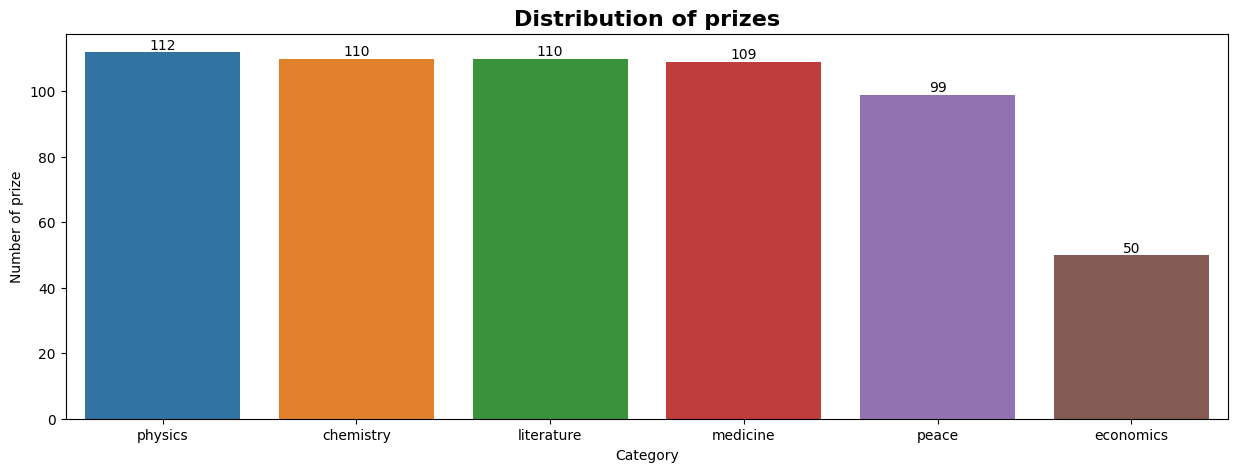

In [201]:
category = list(db.prizes.aggregate([  
  {"$match": {"category": {"$exists": 1}}},
  {"$project": {"_id": 0, "category": 1}},
  {"$group": {"_id": "$category", "count": {"$sum": 1}}},
  {"$sort": {"count": -1}},  
  ]))

names = [doc["_id"] for doc in category]
counts = [doc["count"] for doc in category]

plt.figure(figsize=(15, 5))
ax=sns.barplot(x = names, y = counts)
ax.bar_label(ax.containers[0], padding= 0)
#ax.bar_label(ax.containers[0], label_type = 'center', padding= 0)
plt.xlabel('Category')
plt.ylabel('Number of prize')
plt.title('Distribution of prizes',size=16, weight='bold')
plt.show()

##### => Economics is the field with the lowest number of prizes, which has half as many awards as other fields.

#### 2. Most Nobel Winner Countries

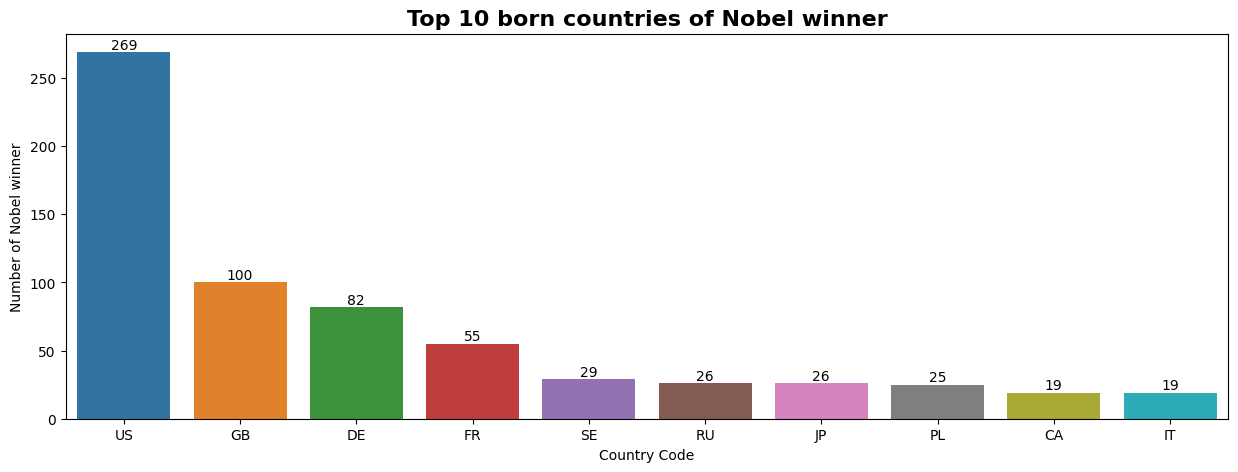

In [295]:
born_country_winner = list(db.laureates.aggregate([
    {"$match": {"bornCountryCode": {"$exists": 1}}},
    {"$project": {"_id": 1, "bornCountryCode": 1}},
    {"$group": {"_id": "$bornCountryCode", "count": {"$sum": 1}}},
    {"$sort": {"count": -1}},
    {"$limit": 10}   ]))

names = [doc["_id"] for doc in born_country_winner]
counts = [doc["count"] for doc in born_country_winner]

plt.figure(figsize=(15, 5))
ax=sns.barplot(x = names, y = counts)
ax.bar_label(ax.containers[0], padding= 0)
#ax.bar_label(ax.containers[0], label_type = 'center', padding= 0)
plt.xlabel('Country Code')
plt.ylabel('Number of Nobel winner')
plt.title('Top 10 born countries of Nobel winner', size=16, weight='bold')
plt.show()

##### => USA, Great Britain, Deutschland (Germany) had the most laureates in these years with remarkable distance

#### 3. Born countries with the highest number of laureates

In [111]:
immigrate_nobel_winner = list(db.laureates.aggregate([  
  {"$match": {"gender": {"$ne": "org"}, "bornCountryCode": {"$exists": 1}, "diedCountryCode": {"$exists": 1}}}, 
  {"$project": {"_id": 0, "bornCountryCode": 1, "diedCountryCode": 1, "isImmigrant": {"$ne": ["$bornCountryCode", "$diedCountryCode"]}}},
  {"$match": {"isImmigrant": True}},
  {"$count": "sum"}
]))
print(str(immigrate_nobel_winner[0].get("sum"))+ ' Nobel winners that born country and died country are different')

183 Nobel winners that born country and died country are different


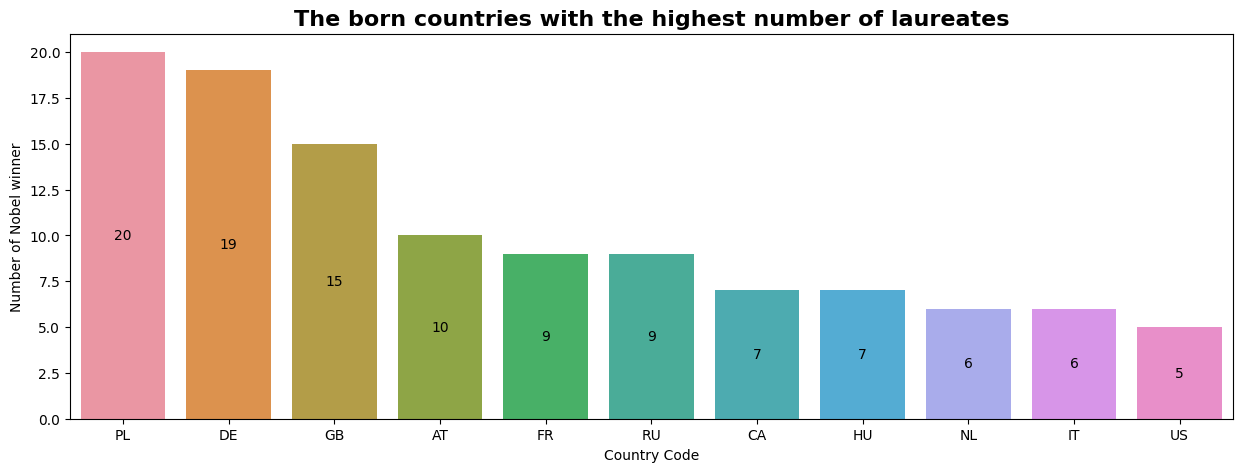

In [294]:
immigrate_nobel_winner_born_country = list(db.laureates.aggregate([  
  {"$match": {"gender": {"$ne": "org"}, "bornCountryCode": {"$exists": 1}, "diedCountryCode": {"$exists": 1}}}, 
  {"$project": {"_id": 0, "bornCountryCode": 1, "diedCountryCode": 1, "isImmigrant": {"$ne": ["$bornCountryCode", "$diedCountryCode"]}}},
  {"$match": {"isImmigrant": True}},
  {"$group": {"_id": "$bornCountryCode", "count": {"$sum": 1}}},
  {"$sort": {"count": -1}},  
  {"$match": {'count': {"$gte": 5}}}
  #{"$limit": 10}
   ]))
   
names = [doc["_id"] for doc in immigrate_nobel_winner_born_country]
counts = [doc["count"] for doc in immigrate_nobel_winner_born_country]

plt.figure(figsize=(15, 5))
ax=sns.barplot(x = names, y = counts)
ax.bar_label(ax.containers[0], label_type = 'center', padding= 0)
plt.xlabel('Country Code')
plt.ylabel('Number of Nobel winner')
plt.title('The born countries with the highest number of laureates', size=16, weight='bold')
plt.show()

##### => Poland, Deutschland(Germany) and Great Britain had the most laureates that won Nobel prizes.

#### 4. Countries with the highest number of immigrant laureates

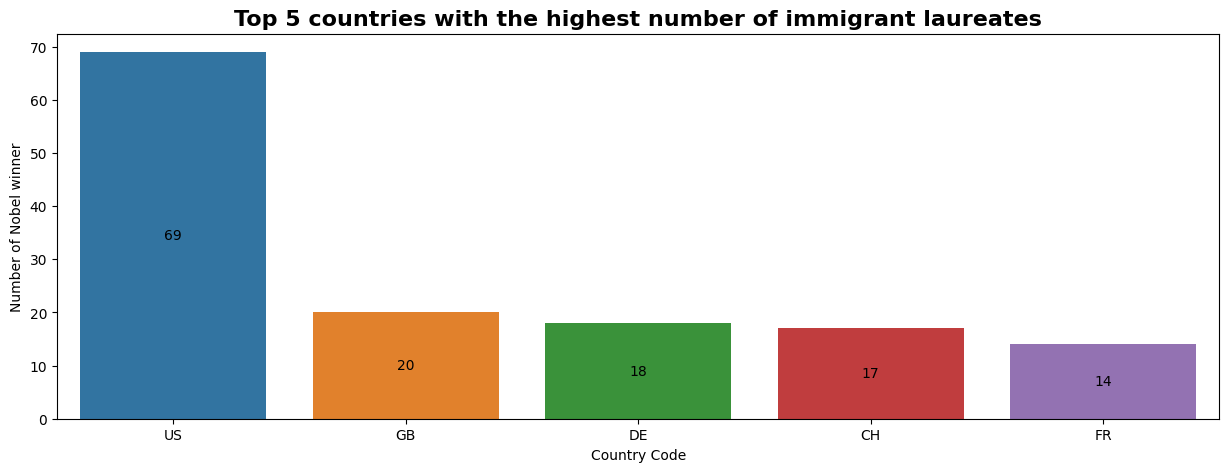

In [293]:
immigrate_nobel_winner_died_country = list(db.laureates.aggregate([  
  {"$match": {"gender": {"$ne": "org"}, "bornCountryCode": {"$exists": 1}, "diedCountryCode": {"$exists": 1}}}, 
  {"$project": {"_id": 0, "bornCountryCode": 1, "diedCountryCode": 1, "isImmigrant": {"$ne": ["$bornCountryCode", "$diedCountryCode"]}}},
  {"$match": {"isImmigrant": True}},
  {"$group": {"_id": "$diedCountryCode", "count": {"$sum": 1}}},
  {"$sort": {"count": -1}},  
  {"$limit": 5}
   ]))
   
names = [doc["_id"] for doc in immigrate_nobel_winner_died_country]
counts = [doc["count"] for doc in immigrate_nobel_winner_died_country]

plt.figure(figsize=(15, 5))
ax=sns.barplot(x = names, y = counts)
ax.bar_label(ax.containers[0], label_type = 'center', padding= 0)
plt.xlabel('Country Code')
plt.ylabel('Number of Nobel winner')
plt.title('Top 5 countries with the highest number of immigrant laureates', size=16, weight='bold')
plt.show()

##### => The USA had the most immigrant laureates

#### 5. The ratio of Winners

In [424]:
nobel_winner_gender = list(db.laureates.aggregate([  
  #{"$unwind": "$prizes"},
  {"$match": {"gender": {"$exists": 1}}}, 
  {"$project": {"_id": 0, "gender": 1}},
  {"$group": {"_id": "$gender", "count": {"$sum": 1}}},
  {"$sort": {"count": -1}},  
  ]))
nobel_winner_gender

[{'_id': 'male', 'count': 859},
 {'_id': 'female', 'count': 51},
 {'_id': 'org', 'count': 24}]

In [423]:
nobel_winner_gender = list(db.laureates.aggregate([  
  {"$unwind": "$prizes"},
  {"$match": {"gender": {"$exists": 1}}}, 
  {"$project": {"_id": 0, "gender": 1}},
  {"$group": {"_id": "$gender", "count": {"$sum": 1}}},
  {"$sort": {"count": -1}},  
  ]))
nobel_winner_gender

[{'_id': 'male', 'count': 862},
 {'_id': 'female', 'count': 52},
 {'_id': 'org', 'count': 27}]

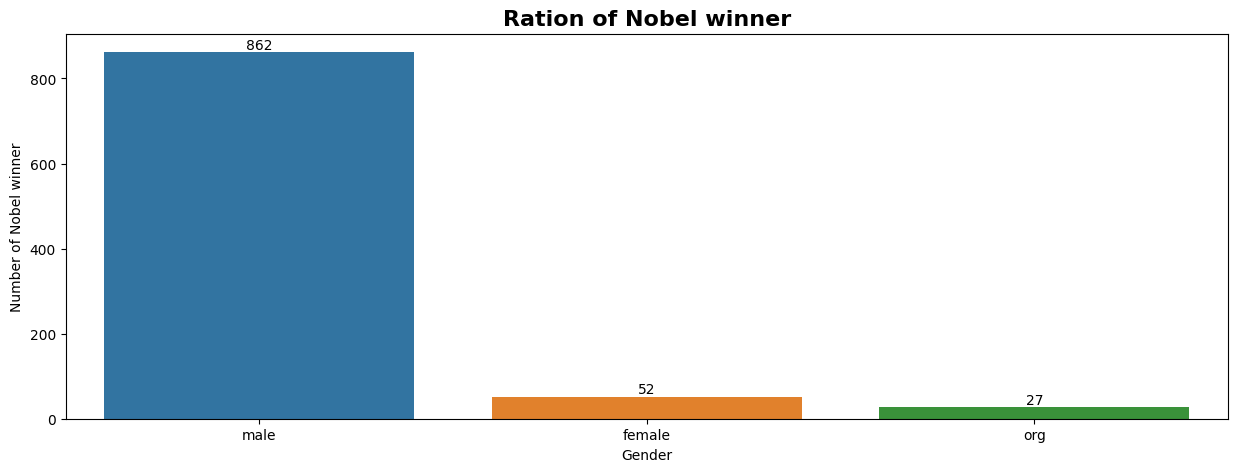

In [425]:
nobel_winner_gender = list(db.laureates.aggregate([  
  {"$unwind": "$prizes"},
  {"$match": {"gender": {"$exists": 1}}}, 
  {"$project": {"_id": 0, "gender": 1}},
  {"$group": {"_id": "$gender", "count": {"$sum": 1}}},
  {"$sort": {"count": -1}},  
  ]))

names = [doc["_id"] for doc in nobel_winner_gender]
counts = [doc["count"] for doc in nobel_winner_gender]

plt.figure(figsize=(15, 5))
ax=sns.barplot(x = names, y = counts)
ax.bar_label(ax.containers[0], padding= 0)
#ax.bar_label(ax.containers[0], label_type = 'center', padding= 0)
plt.xlabel('Gender')
plt.ylabel('Number of Nobel winner')
plt.title('Ration of Nobel winner',size=16, weight='bold')
plt.show()

##### => More than 850 Men won prizes, about 50 Women did and less than 30 for Organizations

#### 6. Number of prize per category

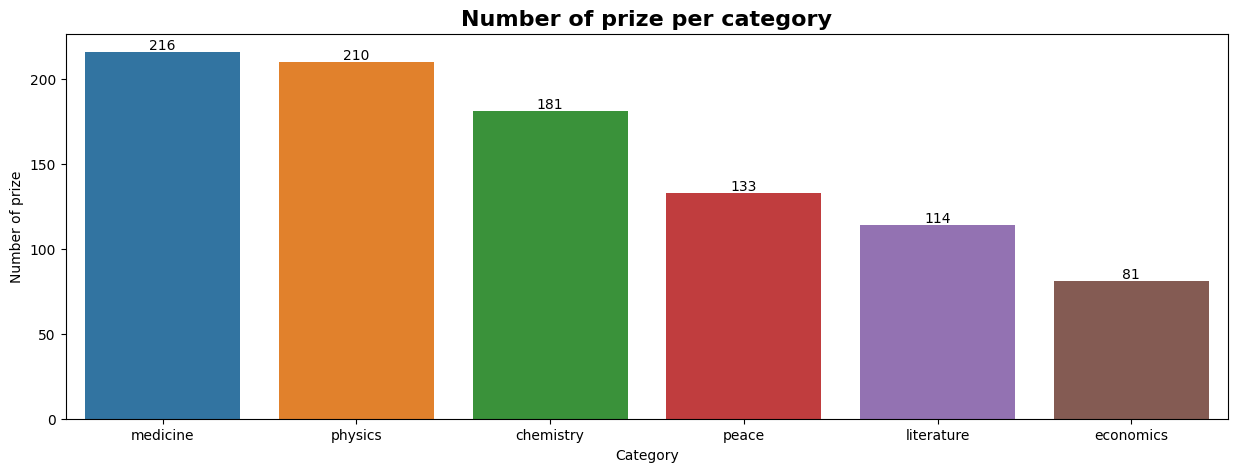

In [291]:
prize_category = list(db.laureates.aggregate([  
  {"$unwind": "$prizes"},
  {"$match": {"prizes.category": {"$exists": 1}}},
  {"$project": {"_id": 0, "prizes.category": 1}},
  {"$group": {"_id": "$prizes.category", "count": {"$sum": 1}}},
  {"$sort": {"count": -1}},  
  ]))

names = [doc["_id"] for doc in prize_category]
counts = [doc["count"] for doc in prize_category]

plt.figure(figsize=(15, 5))
ax=sns.barplot(x = names, y = counts)
ax.bar_label(ax.containers[0], padding= 0)
#ax.bar_label(ax.containers[0], label_type = 'center', padding= 0)
plt.xlabel('Category')
plt.ylabel('Number of prize')
plt.title('Number of prize per category',size=16, weight='bold')
plt.show()

##### => Medicine, Physics and Chemistry are the fields with the highest number of prizes

#### 7. Category By Gender

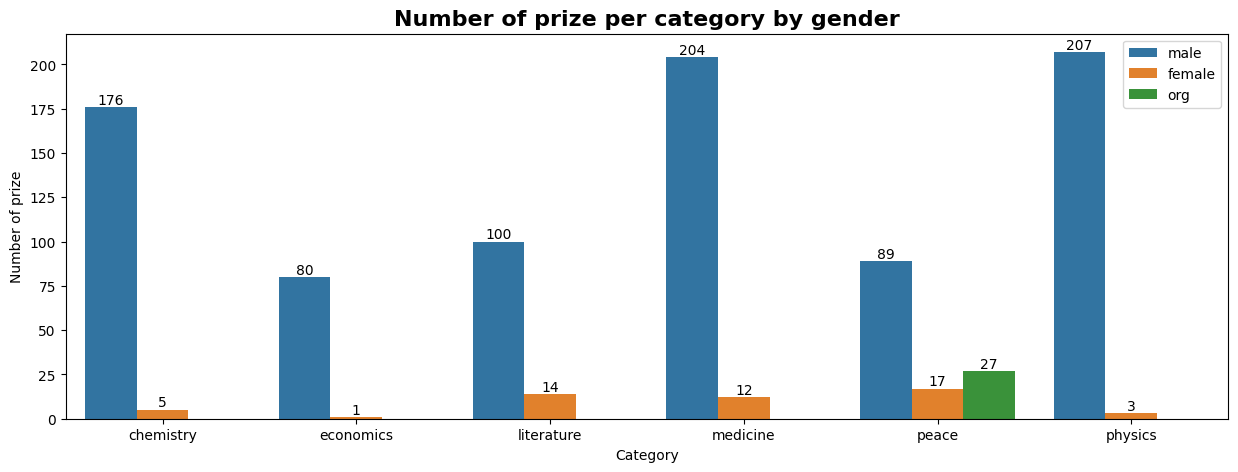

In [427]:
category_gender = list(db.laureates.aggregate([  
  {"$unwind": "$prizes"},
  #{"$match": {"gender": {"$ne": "org"}, "prizes.category": {"$exists": 1}}}, 
  {"$match": {"gender": {"$exists": 1}, "prizes.category": {"$exists": 1}}}, 
  {"$project": {"_id": 0, "prizes.category": 1, "gender": 1}},
  {"$group": {"_id": {"gender": "$gender", "category": "$prizes.category"}, "count": {"$sum": 1}}},
  #{"$project": {"_id": 0, "gender": "$_id.gender", "category": "$_id.category", "count": "$count"}},
  #"$sort": {"category": 1}},  
   {"$sort": {"_id.category": 1, "_id.gender": -1}}, 
  ]))

gender = [doc.get("_id").get("gender") for doc in category_gender]
category = [doc.get("_id").get("category") for doc in category_gender]
counts = [doc["count"] for doc in category_gender]

plt.figure(figsize=(15, 5))
ax=sns.barplot(x = category, y = counts, hue = gender)
ax.bar_label(ax.containers[0], padding= 0)
ax.bar_label(ax.containers[1], padding= 0)
ax.bar_label(ax.containers[2], padding= 0)
#ax.bar_label(ax.containers[0], label_type = 'center', padding= 0)
plt.xlabel('Category')
plt.ylabel('Number of prize')
plt.title('Number of prize per category by gender',size=16, weight='bold')
plt.show()

##### => Women have won the most prizes in Medicine, Literature and Peace while Physics, Medicine and Chemistry are the most popular fields for men. Organizations have solely received honors in the sphere of peace.

#### 8. Top Universities that Nobel winners studied

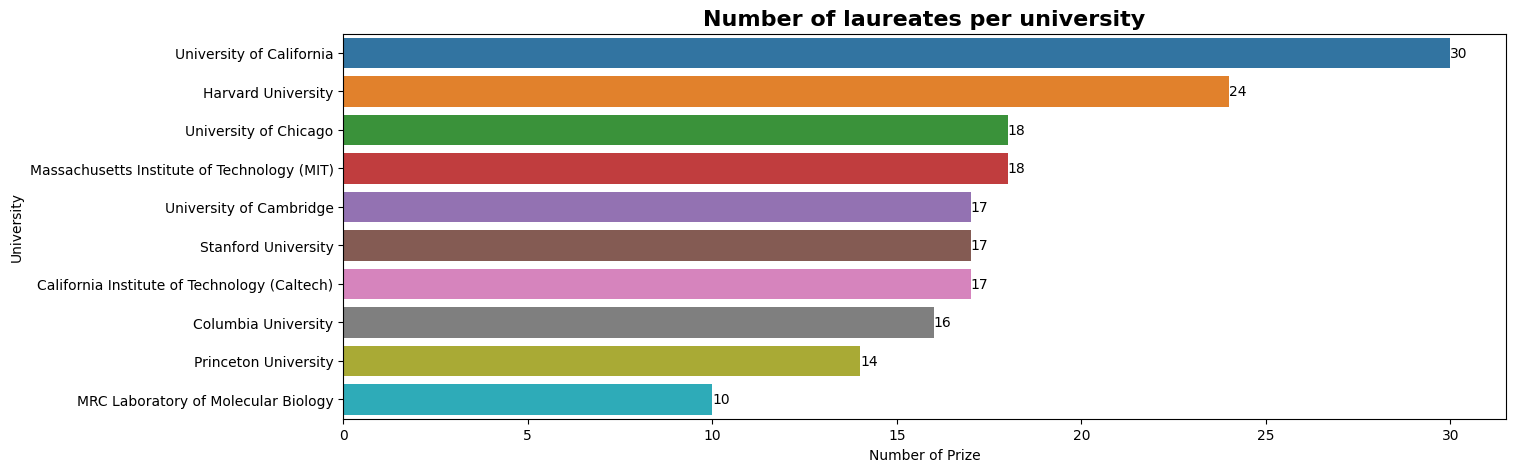

In [271]:
nobel_university_winner = list(db.laureates.aggregate([  
  {"$unwind": "$prizes"},
  {"$match": {"prizes.affiliations.name": {"$exists": 1}}},
  {"$project": {"_id": 0, "prizes.affiliations.name": 1}},
  {"$group": {"_id": "$prizes.affiliations.name", "count": {"$sum": 1}}},
  {"$sort": {"count": -1}}, 
  {"$match": {'count': {"$gte": 10}}} 
  ]))
  
universities = [doc.get("_id")[0] for doc in nobel_university_winner]
count = [doc.get("count") for doc in nobel_university_winner]

plt.figure(figsize=(15, 5))
ax=sns.barplot(x = count, y = universities)
ax.bar_label(ax.containers[0], padding= 0)
#ax.bar_label(ax.containers[0], label_type = 'center', padding= 0)
plt.xlabel('Number of Prize')
plt.ylabel('University')
plt.title('Number of laureates per university',size=16, weight='bold')
plt.show()

##### => University of California, Harvard University, University of Chicago and Massachusetts Institute of Technology (MIT) are top 3 Universities that Nobel winners studied there

#### 9. Distribution of Age Winners get prize

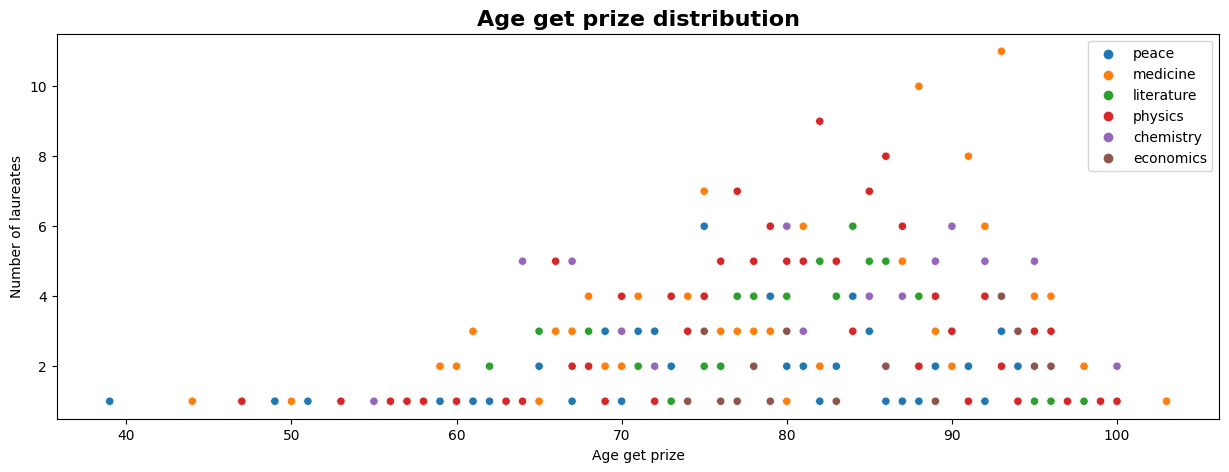

In [508]:
nobel_winner_age = list(db.laureates.aggregate([  
  {"$unwind": "$prizes"},
  {"$match": {"prizes.category": {"$exists": 1}, 
              "born": {"$exists": 1}, "died": {"$exists": 1}, 
              "born": {"$ne": "0000-00-00"}, "died": {"$ne": "0000-00-00"}}},
  {"$project": {"_id": 0,  "prizes.category": 1,
              "born_year": {"$toInt": {"$substr": ["$born", 0, 4]}}, 
              "died_year": {"$toInt": {"$substr": ["$died", 0, 4]}}}},
  {"$addFields": {"year_old": {"$subtract": ["$died_year", "$born_year"]}}},
  {"$group": {"_id": {"age": "$year_old", "category": "$prizes.category"}, "count": {"$sum": 1}}},
  {"$sort": {"_id": 1}}
  ])) 
  
age = [doc.get("_id").get("age") for doc in nobel_winner_age]
count = [doc.get("count") for doc in nobel_winner_age]
cat = [doc.get("_id").get("category") for doc in nobel_winner_age]

plt.figure(figsize=(15, 5))

ax=sns.scatterplot(y = count, x = age, hue = cat)
#ax=sns.barplot(y = count, x = age)
#ax.bar_label(ax.containers[0], padding= 0)
plt.xlabel('Age get prize')
plt.ylabel('Number of laureates')
plt.title('Age get prize distribution',size=16, weight='bold')
plt.show()

##### => The ages between 75 and 95 years old are the highest number of laureates, particularly the peak at 85 ages.

#### 10. Age of winners seperate by gender and prize category

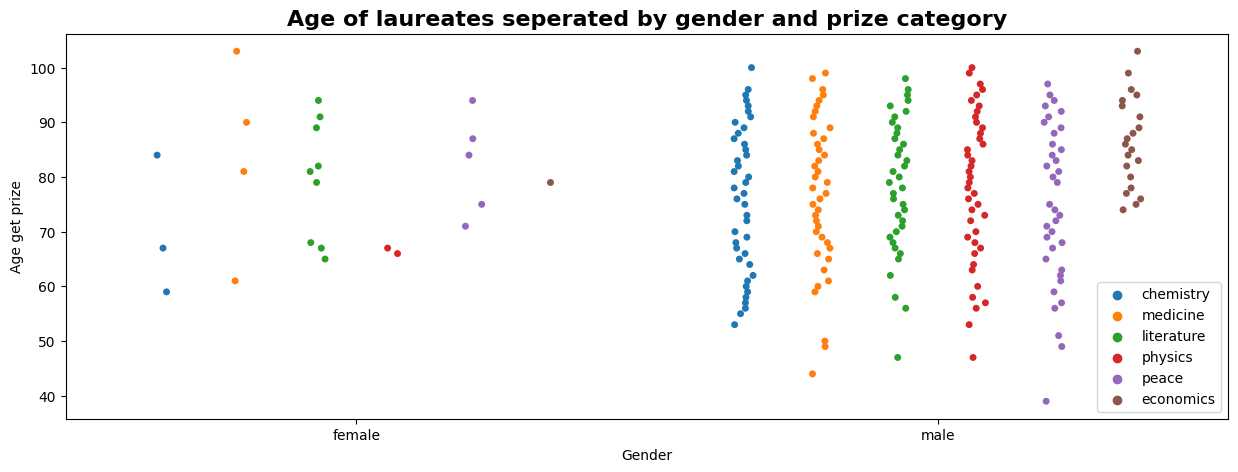

In [540]:
nobel_winner_age_gender = list(db.laureates.aggregate([  
  {"$unwind": "$prizes"},
  {"$match": {"gender": {"$ne": "org"}, "prizes.category": {"$exists": 1}, 
                "born": {"$exists": 1}, "died": {"$exists": 1}, 
                "born": {"$ne": "0000-00-00"}, "died": {"$ne": "0000-00-00"}}},
  {"$project": {"_id": 0, "prizes.category": 1, "gender": 1,
                "born_year": {"$toInt": {"$substr": ["$born", 0, 4]}}, 
                "died_year": {"$toInt": {"$substr": ["$died", 0, 4]}}}},
  {"$addFields": {"year_old": {"$subtract": ["$died_year", "$born_year"]}}},
  {"$group": {"_id": {"gender": "$gender", "age": "$year_old", "category": "$prizes.category"}, "count": {"$sum": 1}}},
  {"$sort": {"_id": 1}}
  ]))


#count = [doc.get("count") for doc in nobel_winner_age_gender]
gender = [doc.get("_id").get("gender") for doc in nobel_winner_age_gender]
age = [doc.get("_id").get("age") for doc in nobel_winner_age_gender]
cat = [doc.get("_id").get("category") for doc in nobel_winner_age_gender]


plt.figure(figsize=(15, 5))
ax=sns.stripplot(x = gender, y = age, hue = cat, dodge=True)
plt.ylabel('Age get prize')
plt.xlabel('Gender')
plt.title('Age of laureates seperated by gender and prize category', size=16, weight='bold')
plt.show()

#### #. Top cities that Nobel winners studied

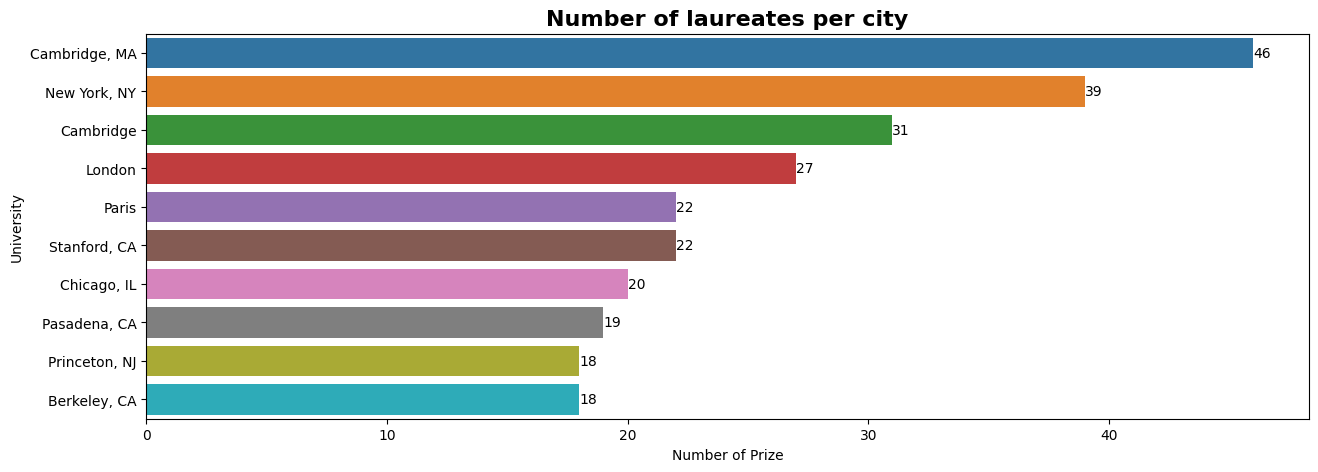

In [539]:
nobel_city_winner = list(db.laureates.aggregate([  
  {"$unwind": "$prizes"},
  {"$match": {"prizes.affiliations.city": {"$exists": 1}}},
  {"$project": {"_id": 0, "prizes.affiliations.city": 1}},
  {"$group": {"_id": "$prizes.affiliations.city", "count": {"$sum": 1}}},
  {"$sort": {"count": -1}}, 
  #{"$match": {'count': {"$gte": 10}}} 
  {"$limit": 10}
  ]))
  
city = [doc.get("_id")[0] for doc in nobel_city_winner]
count = [doc.get("count") for doc in nobel_city_winner]

plt.figure(figsize=(15, 5))
ax=sns.barplot(x = count, y = city)
ax.bar_label(ax.containers[0], padding= 0)
#ax.bar_label(ax.containers[0], label_type = 'center', padding= 0)
plt.xlabel('Number of Prize')
plt.ylabel('University')
plt.title('Number of laureates per city',size=16, weight='bold')
plt.show()

##### => Cambridge MA, New York, and Cambridge are top cities of universities that Nobel winners studied there